<a href="https://colab.research.google.com/github/Huz4r/Team_work_trees_classification/blob/joanna/Joanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd /content/drive/MyDrive/Team_work_trees_classification

/content/drive/MyDrive/Team_work_trees_classification


In [18]:
import PIL
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os 
import pathlib 

from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

**Loading dataset**

In [19]:
path = pathlib.Path("data/Trees_256_256")

In [20]:
Beech = list(path.glob('Beech/*'))[:200]
Brich = list(path.glob('Brich/*'))[:200]
Chestnut = list(path.glob('Chestnut/*'))[:200]
Pine = list(path.glob('Pine/*'))[:200]

In [21]:
data = {
    'Beech' : Beech,
    'Brich' : Brich,
    'Chestnut' : Chestnut,
    'Pine' : Pine,
}
tree_labels= {k:v for k,v in enumerate(data.keys())}

**Visualization**

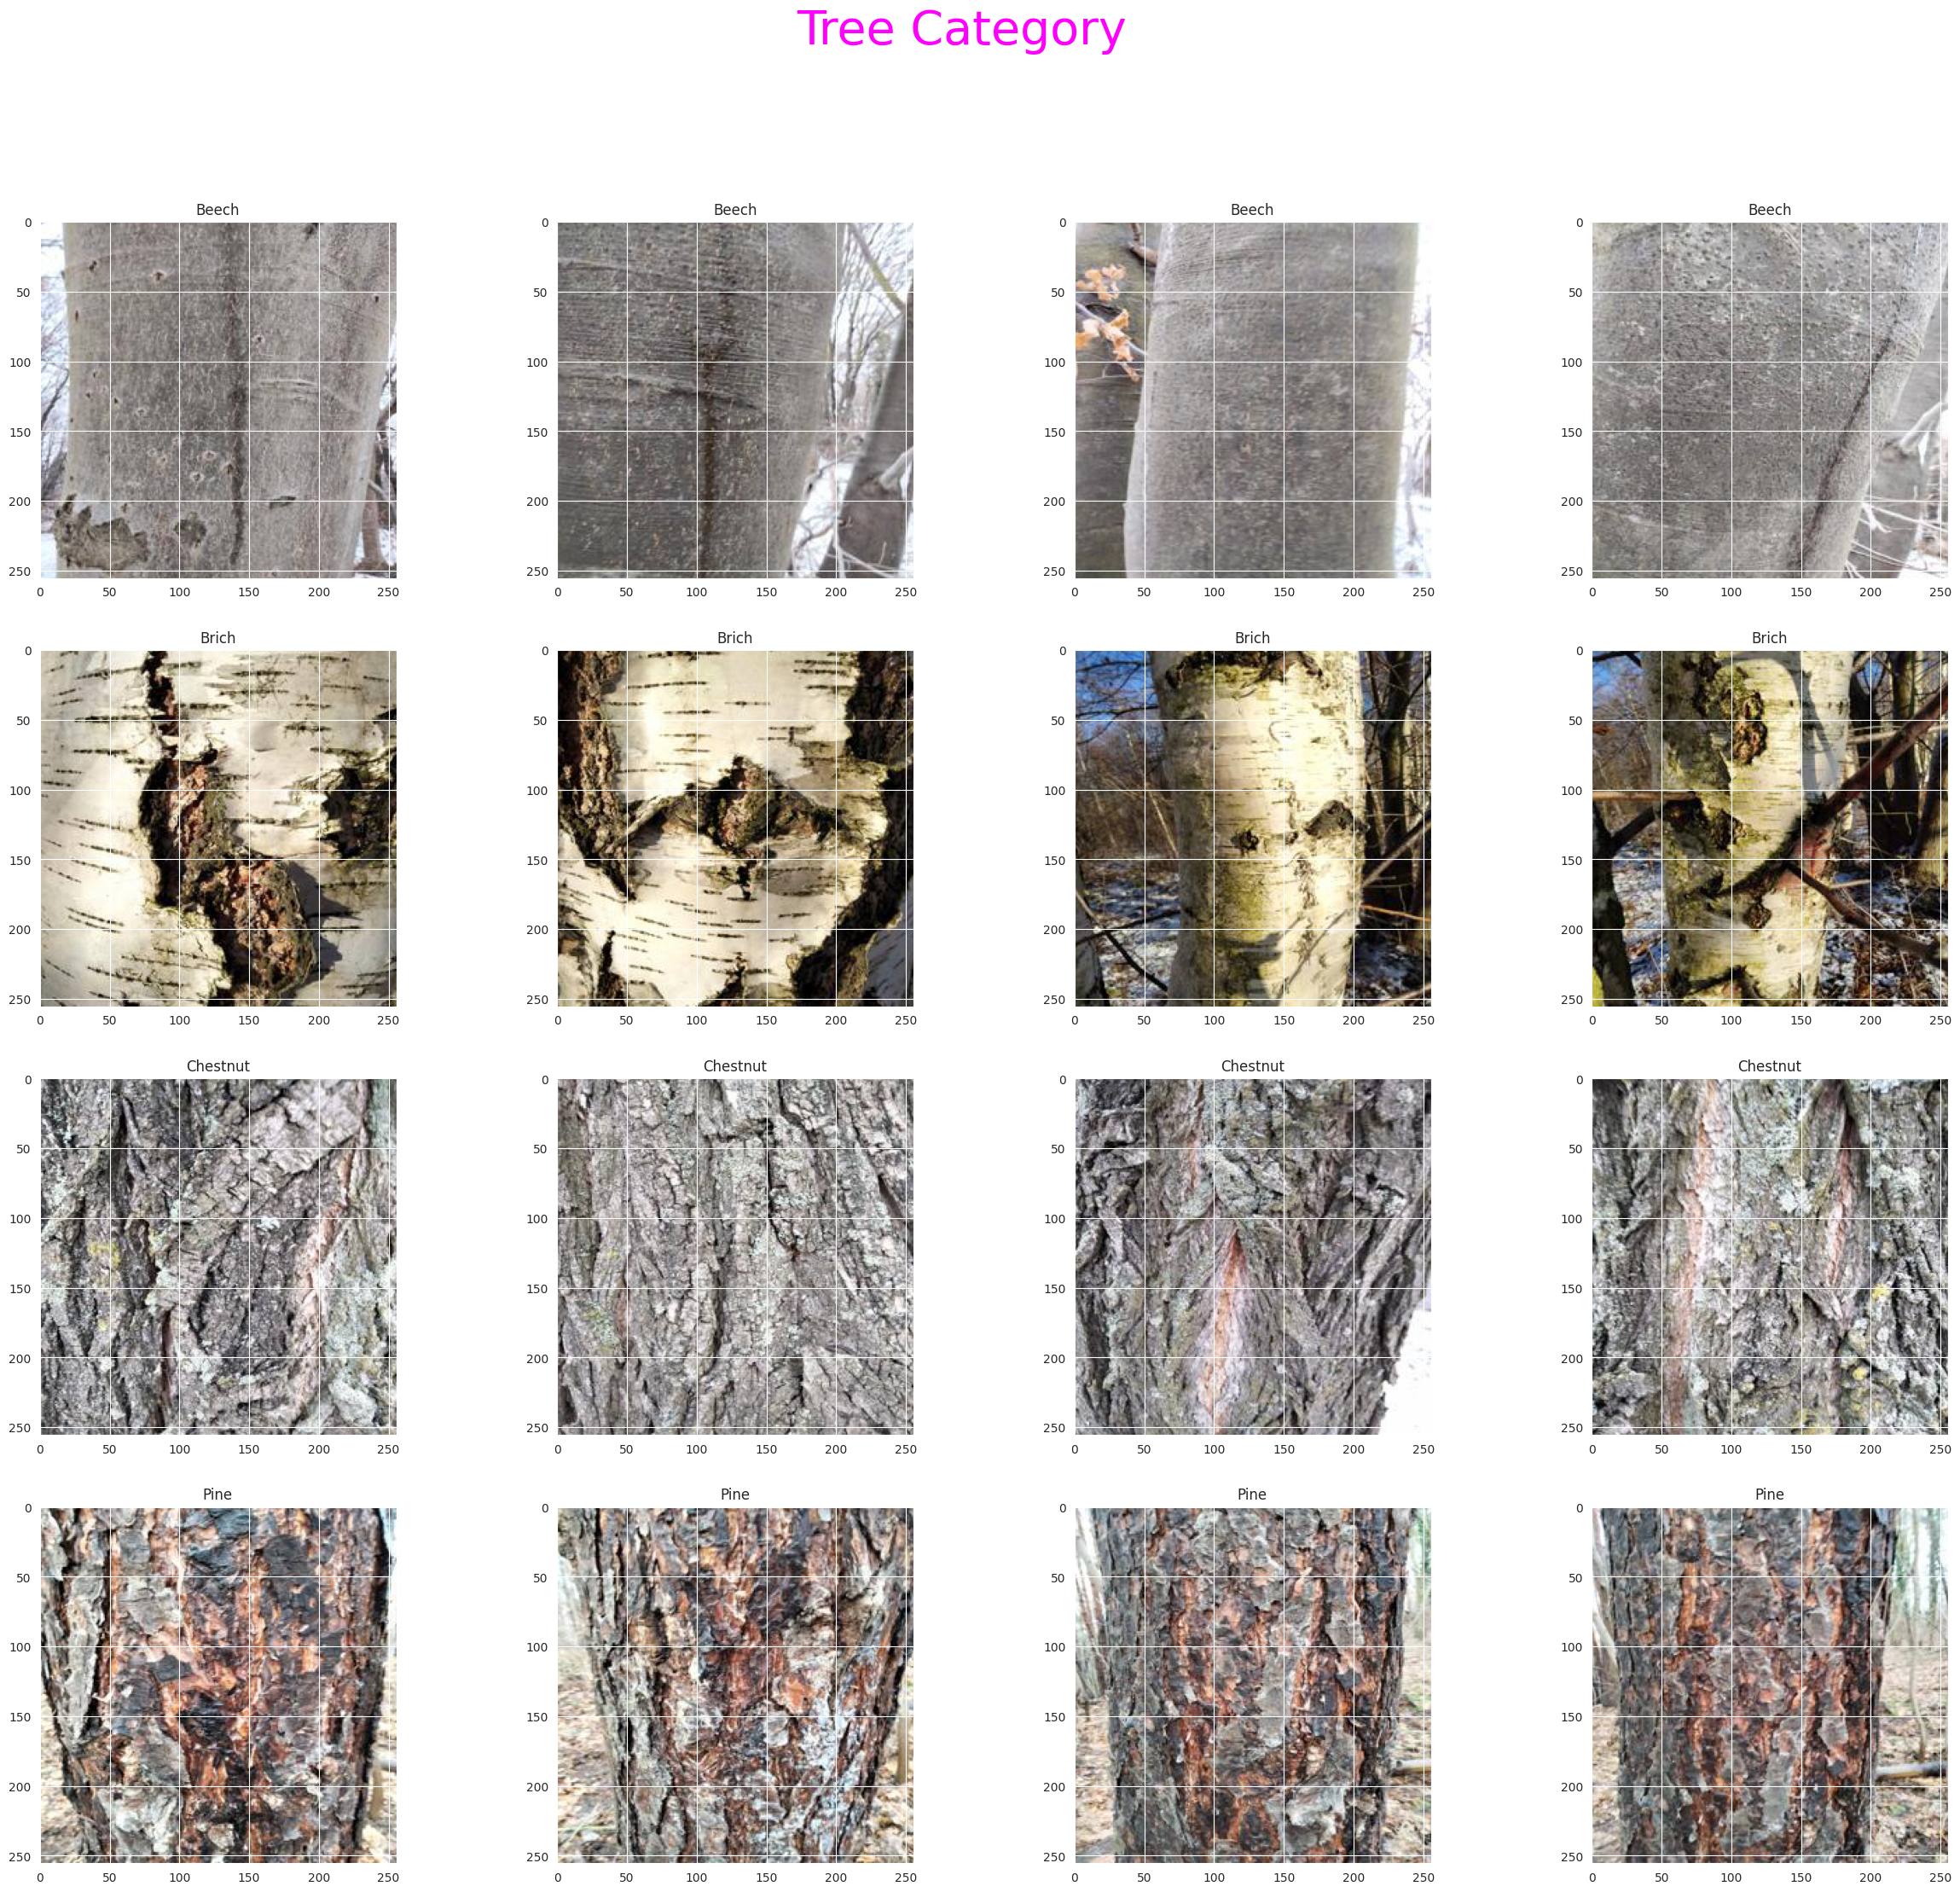

In [22]:
fig, ax = plt.subplots(4,4, figsize=(30,25))
fig.suptitle('Tree Category',color='magenta',fontsize=40)
for i in range(4):
    for j in range(4):
        image = img.imread(data.get(tree_labels.get(i))[j])
        ax[i, j].imshow(image)
        ax[i, j].set_title(tree_labels.get(i))

Train & Test **Definition**

In [23]:
# Define the path to the root directory containing the image folders
data_path = 'data/Trees_256_256'

# Define a list to hold the image data and their corresponding labels
data = []
labels = []

# Loop through each folder and extract the image data and labels
for label, folder in enumerate(os.listdir(data_path)):
    folder_path = os.path.join(data_path, folder)
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = load_img(image_path, target_size=(256, 256))
        image = img_to_array(image)
        data.append(image)
        labels.append(label)

# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [24]:
from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

print('Training data shape:', train_data.shape)
print('Training labels shape:', train_labels.shape)
print('Testing data shape:', test_data.shape)
print('Testing labels shape:', test_labels.shape)

Training data shape: (694, 256, 256, 3)
Training labels shape: (694,)
Testing data shape: (174, 256, 256, 3)
Testing labels shape: (174,)


In [25]:
# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the neural network
history = model.fit(
        train_data,
        train_labels,
        batch_size=32,
        epochs=10,
        validation_data=(test_data, test_labels))

Epoch 1/10
22/22 [==============================] - 110s 5s/step - loss: 167.3199 - accuracy: 0.2594 - val_loss: 1.3763 - val_accuracy: 0.4023
Epoch 2/10
22/22 [==============================] - 107s 5s/step - loss: 1.2908 - accuracy: 0.4236 - val_loss: 1.0761 - val_accuracy: 0.4483
Epoch 3/10
22/22 [==============================] - 104s 5s/step - loss: 0.8100 - accuracy: 0.6585 - val_loss: 0.3999 - val_accuracy: 0.8793
Epoch 4/10
22/22 [==============================] - 108s 5s/step - loss: 0.5147 - accuracy: 0.8084 - val_loss: 0.3791 - val_accuracy: 0.8793
Epoch 5/10
22/22 [==============================] - 106s 5s/step - loss: 0.4193 - accuracy: 0.8458 - val_loss: 0.2877 - val_accuracy: 0.9080
Epoch 6/10
22/22 [==============================] - 106s 5s/step - loss: 0.2743 - accuracy: 0.8977 - val_loss: 0.3209 - val_accuracy: 0.8908
Epoch 7/10
22/22 [==============================] - 107s 5s/step - loss: 0.2376 - accuracy: 0.9207 - val_loss: 0.3146 - val_accuracy: 0.9023
Epoch 8/10


In [30]:
model.save('model.h5')

In [28]:
# Evaluate the model on the test dataset
score = model.evaluate(test_data, test_labels)
print("Accuracy: %.2f%%" % (score[1]*100))

6/6 [==============================] - 6s 980ms/step - loss: 0.3649 - accuracy: 0.9023
Accuracy: 90.23%


1/1 [==============================] - 0s 69ms/step


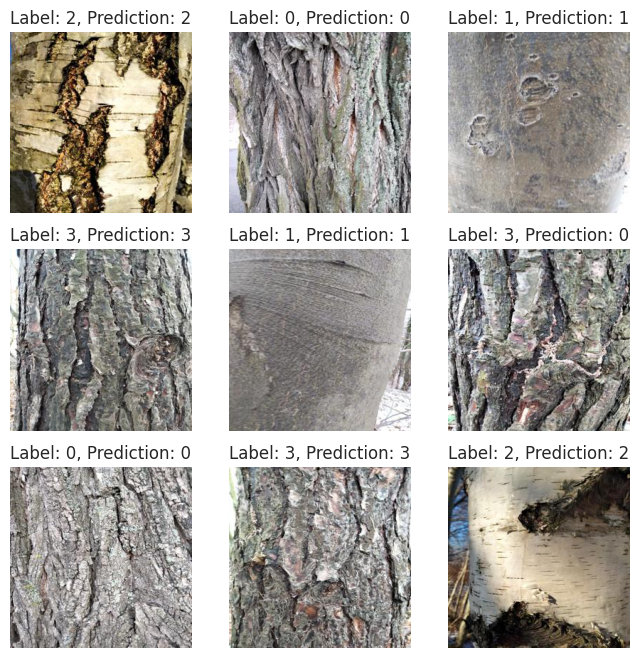

In [29]:
# Print out example images from the test set with their predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    prediction = np.argmax(model.predict(np.expand_dims(test_data[i], axis=0)))
    ax.imshow(test_data[i].astype('uint8'))
    ax.set_title(f"Label: {test_labels[i]}, Prediction: {prediction}")
    ax.axis('off')
plt.show()